# Aprendizaje Automático - Práctica 3 - Ajuste de Modelos Lineales

# Problema de Regresión

#### Valoración máxima: 6 puntos

#### Fecha límite de entrega: 4 de Junio de 2023 a las 23:59

#### Entrega a través de https://pradogrado2223.ugr.es/

### Nombre completo: <mark>MORENO MORÓN, JAVIER</mark>



---

**Normas de desarrollo y entrega de trabajos**

- Única y exclusivamente se debe entregar este Notebook de Colab (fichero .ipynb). No es necesario entregar ninguna memoria externa, pero el código debe estar bien comentado, y todas las decisiones tomadas y el trabajo desarrollado deben documentarse suficientemente en celdas de texto.

- La entrega en PRADO está configurada para permitir sucesivas entregas de la práctica. Desde este punto de vista, se recomienda subir versiones de la práctica a medida que se van realizando los distintos ejercicios propuestos, y no dejarlo todo para el final, dado que es altamente improbable que se extienda la fecha de entrega.

- Reiterar que es obligatorio documentar las valoraciones y decisiones adoptadas en el desarrollo de cada uno de los apartados. Debe incluirse también una valoración razonada sobre la calidad de los
resultados obtenidos. Sin esta documentación, se considera que el trabajo NO ha sido presentado.

- Se debe respetar la estructura y secciones del Notebook. Esto servirá para agilizar las correcciones, así como para identificar con facilidad qué ejercicio/apartado se está respondiendo.

- El codigo NO puede escribir nada a disco.

- Se espera que el código siempre lea de un directorio llamado 'drive/MyDrive/Colab Notebooks/datos/', situado dentro del directorio donde se desarrolla y ejecuta la práctica. No se admiten excepciones a esta ruta de acceso a los datos.

- Una entrega es apta para ser corregida si se puede ejecutar de principio a fin sin errores.

- No es válido usar opciones en las entradas (es decir, utilizar el comando `input`, por ejemplo, para que el usuario escoja el valor de las variables para ejecutar el programa). Para ello, se deben fijar al comienzo los valores
por defecto que se consideren óptimos o que se soliciten en el enunciado.

- El código debe estar obligatoriamente comentado explicando lo que realizan los distintos apartados y/o bloques.

- Se entrega solamente este Notebook, y no los datos empleados.


---

<font color='blue'>Este trabajo  se centra en el ajuste y selección del mejor predictor lineal para un conjunto de datos dado. Para ello, se recomienda el uso de la librería Scikit-Learn (https://scikit-learn.org/). Esta librería contiene funciones de alto nivel que pueden ser muy útiles para el desarrollo de la práctica. En cualquier caso, para cada función de Scikit-Learn que se use, debe explicar por qué es necesario su uso, así como explicar su funcionamiento y el significado de todos sus parámetros. En relación con este punto, los valores por defecto en la librería no se consideran elecciones justificadas $\textit{a priori}$ y, al igual que en el resto de la práctica, decisiones sin justificación y resultados sin interpretación no serán considerados válidos.



#### <font color='blue'>1)  Analizar y describir adecuadamente el problema a resolver. Identificar los elementos $X$, $Y$ and $f$ del problema, y describirlos en detalle. 0.5 puntos.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = np.loadtxt('drive/MyDrive/Colab Notebooks/datos/OnlineNewsPopularity.csv', delimiter=',', skiprows=1, usecols=range(1, 61))

dataset

array([[7.31000000e+02, 1.20000000e+01, 2.19000000e+02, ...,
        0.00000000e+00, 1.87500000e-01, 5.93000000e+02],
       [7.31000000e+02, 9.00000000e+00, 2.55000000e+02, ...,
        5.00000000e-01, 0.00000000e+00, 7.11000000e+02],
       [7.31000000e+02, 9.00000000e+00, 2.11000000e+02, ...,
        5.00000000e-01, 0.00000000e+00, 1.50000000e+03],
       ...,
       [8.00000000e+00, 1.00000000e+01, 4.42000000e+02, ...,
        4.54545455e-02, 1.36363636e-01, 1.90000000e+03],
       [8.00000000e+00, 6.00000000e+00, 6.82000000e+02, ...,
        5.00000000e-01, 0.00000000e+00, 1.10000000e+03],
       [8.00000000e+00, 1.00000000e+01, 1.57000000e+02, ...,
        1.66666667e-01, 2.50000000e-01, 1.30000000e+03]])

IMPORTANTE: Para poder ejecutar este fragmento y obtener así el dataset se necesita tener el archivo OnlineNewsPopularity.csv en el directorio Colab Notebooks/datos/ de su Google Drive. Este fichero se puede descargar desde la página de UCI que se nos facilita en el guion de la práctica.

Con la función loadtxt podemos pasar los datos del formato .csv a un array numpy, para ello indicamos que estos están separados por comas, que no se tenga en cuenta la primera fila, ya que en esta están los nombres de los atributos y por último que tampoco se use la primera columna, ya que esta contiene las url's de las páginas webs y se nos indica que esta característica no es predictora, la segunda columna tiene una característica que tampoco es predictora, pero ya la quitaremos más adelante.

Ahora que ya tenemos el dataset pasemos a hablar un poco acerca del problema. Este dataset ha sido donado por una serie de universidades portuguesas, aunque el verdadero lugar de procedencia de los datos es la página web www.mashable.com, aunque los valores del mismo fueron modificados, estos nuevos valores fueron estimados usando un clasificador Random Forest.

Según la documentación nuestro dataset está compuesto de 39797 muestras, con 61 atributos distintos, aunque los dos primeros no son predictores y el último hace referencia a la etiqueta de la muestra.

Los atributos guardan información acerca de la página web en cuestión indicada en la columna 0.
* La columna 1 que tampoco era predictora indica los días transcurridos desde la obtención de los datos a la publicación del artículo.
* De las columnas 2 a 6 se guarda información sobre el número de palabras que hay en x condiciones en la página web.
* 7 y 8 Nº de links, 9 imagenes y 10 videos.
* 11 tamaño medio de palabra, 12 Nº de keywords en los metadatos.
* De 13 a 18 sobre si la página es sobre x tema, es decir, variables binarias.
* De 19 a 30 acerca de las keywords y su número de shares.
* De 31 a 38 sobre si el artículo había sido publicado en x día de la semana, todo atributos binarios.
* De 39 a 43 cercanía a ciertos tipos de topics.
* Y el resto analizan el texto y las palabras de la página web.

Por último tenemos la etiqueta, la cual indica el número de shares a dicha página y es el atributo que debemos predecir con nuestro ajuste.

A continuación vamos a visualizar los datos para conocerlos más a fondo.

In [ ]:
from sklearn.model_selection import train_test_split

# Separamos en train y test
train_x, test_x, train_y, test_y = train_test_split(dataset[:,1:-1], dataset[:,-1], test_size=0.1, random_state=0)

train_x = np.array(train_x)
train_y = np.array(train_y)
test_x = np.array(test_x)
test_y = np.array(test_y)

Para separar los datos usamos la función de scikit-learn train_test_split, que me separa el dataset en train y test, le pasamos el propio dataset, el tamaño en porcentaje que queremos que tenga test, le doy valor 0.1 para disponer de bastantes datos para entrenar y gracias a que el dataset contaba con tantas muestras tenemos un conjunto test medianamente grande usando solo el 10% de las muestras. Por último random_state sirve para inicializar la semilla, yo siempre suelo usar la 0.

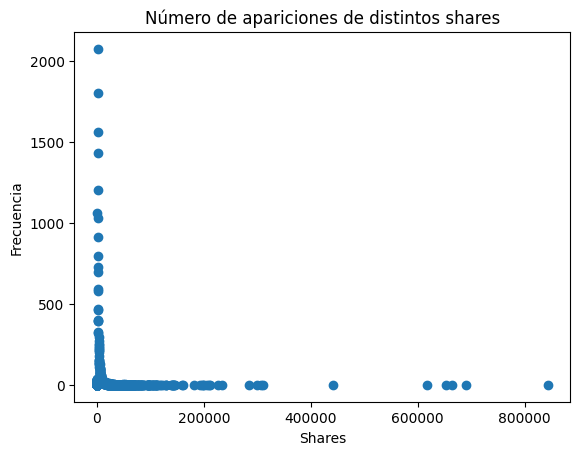

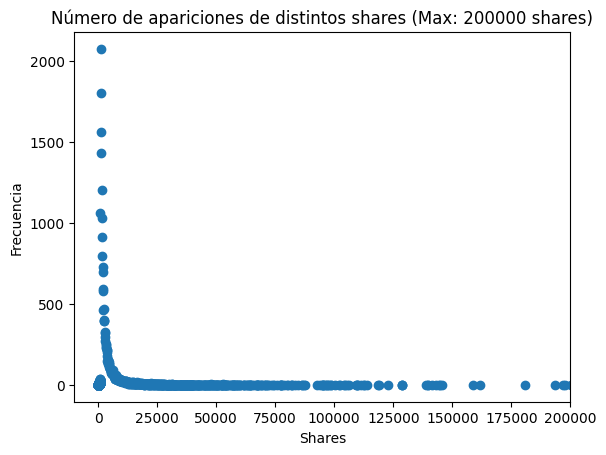

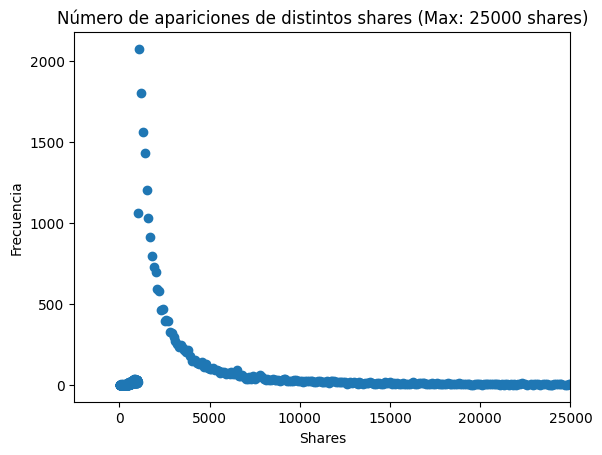

In [ ]:
# Obtener los shares únicos y sus frecuencias
shares, frecuencias = np.unique(train_y, return_counts=True)

# Ordenar los shares y las frecuencias de menor a mayor
shares_ordenados = np.sort(shares)
frecuencias_ordenadas = frecuencias[np.argsort(shares)]

# Crear el scatter plot
plt.scatter(shares_ordenados, frecuencias_ordenadas)

# Establecer etiquetas y título de los ejes
plt.xlabel('Shares')
plt.ylabel('Frecuencia')
plt.title('Número de apariciones de distintos shares')

# Mostrar el gráfico
plt.show()


# Crear el scatter plot (con eje X reducido)
plt.scatter(shares_ordenados, frecuencias_ordenadas)

# Establecer etiquetas y título de los ejes
plt.xlabel('Shares')
plt.ylabel('Frecuencia')
plt.title('Número de apariciones de distintos shares (Max: 200000 shares)')
plt.xlim(-10000, 200000)

# Mostrar el gráfico
plt.show()


# Crear el scatter plot (con eje X reducido)
plt.scatter(shares_ordenados, frecuencias_ordenadas)

# Establecer etiquetas y título de los ejes
plt.xlabel('Shares')
plt.ylabel('Frecuencia')
plt.title('Número de apariciones de distintos shares (Max: 25000 shares)')
plt.xlim(-2500, 25000)

# Mostrar el gráfico
plt.show()

Con los siguientes gráficos podemos observar que la mayoría de muestras no pasan de los 5000 shares, también vemos posibles datos extremos en el primer gráfico, que trataremos más adelante. Por último con el primer gráfico podemos observar también que a excepción del gran número de muestras con menos de 5000 shares existe un aumento lineal de los shares en el mismo número de muestras hasta llegar a los 200000 shares, donde aparecen unas pocas muestras ya de forma expontanea.

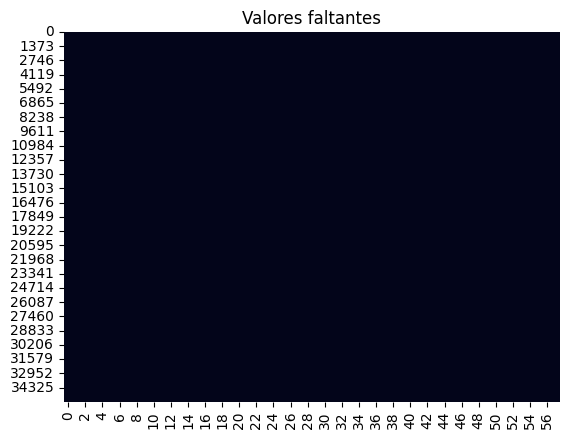

In [ ]:
import seaborn as sns

# Mapa de calor para visualizar valores faltantes
sns.heatmap(np.isnan(train_x), cbar=False)
plt.title('Valores faltantes')
plt.show()

Continuamos con la visualización de los datos, ahora vemos si hay algún dato faltante, en la documentación nos decían que no, pero no está de más comprobarlo, con un heatmap vemos si hay posiciones sin un valor numérico, vemos que no.

In [ ]:
sabado = train_x[:, 34]
domingo = train_x[:, 35]
finde = train_x[:, 36]

# Vemos que posiciones son True para estas tres columnas
pos_sabado = np.where(sabado == 1)
pos_domingo = np.where(domingo == 1)
pos_finde = np.where(finde == 1)

# Si todos los Trues de sabado y domingo están en finde, este es irrelevante
esta_sabado = np.all(np.isin(pos_sabado, pos_finde))
esta_domingo = np.all(np.isin(pos_domingo, pos_finde))

if esta_sabado and esta_domingo:
  # Eliminamos la característica finde
  sinFinde_train_x = np.delete(train_x, 36, axis=1)
  sinFinde_test_x = np.delete(test_x, 36, axis=1)

Viendo el diccionario del dataset, tenemos que hay unas características que indican si la página web ha sido abierta en x día de la semana, aparte otra característica indica si ha sido abierta en fin de semana, tiene pinta que esa característica es redundante, comprobamos si con las características sabado y domingo hacemos la característica fin de semana, y en efecto la formamos, por lo que borramos la característica redundante.

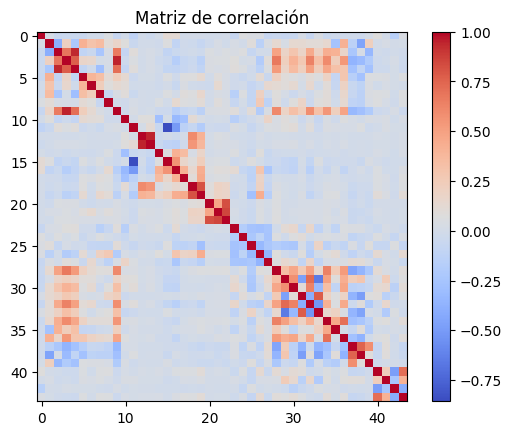

In [ ]:
# Crear una lista con los índices de las columnas categóricas
columnas_categoricas = [11, 12, 13, 14, 15, 16, 29, 30, 31, 32, 33, 34, 35]

# Filtrar las columnas categóricas del dataset
data_categoricas = sinFinde_train_x[:, columnas_categoricas]

# Eliminar las columnas categóricas del dataset original
columnas_numericas = [i for i in range(sinFinde_train_x.shape[1]) if i not in columnas_categoricas]
data_numericas = sinFinde_train_x[:, columnas_numericas]

# Calcular la matriz de correlación para las columnas numéricas
correlation_matrix = np.corrcoef(data_numericas, rowvar=False)

# Visualizar la matriz de correlación en un mapa de calor
plt.imshow(correlation_matrix, cmap='coolwarm')
plt.colorbar()
plt.title('Matriz de correlación')
plt.show()

Para poder construir la matriz de correlación primero debemos discriminar toda variable categórica, ya que esta solo sirve para variables continuas, en nuestro caso como habíamos mencionado anteriormente existen variables binarias que no podemos aplicarle correlación, por lo que las excluimos.

Una vez excluidas construimos la matriz de correlación y observamos que no existe practicamente relaciones entre las categorías, observamos tonos rojos entre categorías contiguas, por lo que tal vez si que haya algún par de atributos relacionados entre ellos y podamos reducir la dimensionalidad.

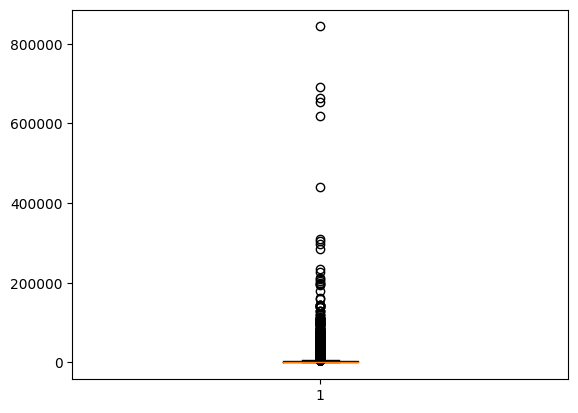

In [ ]:
# Crear el diagrama de caja
plt.boxplot(train_y)

# Mostrar el diagrama de caja
plt.show()

Con el siguiente diagrama de caja podemos observar mejor que en el gráfico anterior los valores extremos, consideraré las muestras con más de 400000 shares muestras atípicas, por lo que las eliminaré del dataset para evitar que estos influyan negativamente en el entrenamiento.

#### <font color='blue'>2)  Identificar qué conjuntos de hipótesis se emplearán y justificar dicha elección. 0.25 puntos.

Un modelo que he de elegir si o si es Regresión Lineal, este es el modelo más comúnmente usado para problemas de regresión, algunas de sus ventajas son:
* Interpretación: La regresión lineal proporciona coeficientes que representan la contribución relativa de cada variable de entrada al resultado de la predicción. Esto permite una interpretación clara y comprensión de la relación entre las variables.

* Simplicidad: La regresión lineal es un modelo simple y fácil de implementar. No requiere una gran cantidad de ajustes de hiperparámetros y es relativamente rápido de entrenar.

* Buena opción inicial: La regresión lineal puede servir como un buen punto de partida para problemas de regresión. Proporciona una línea de base sólida para comparar con otros modelos más complejos y determinar si hay mejoras significativas.

Sin embargo, es importante tener en cuenta que la regresión lineal asume una relación lineal entre las variables de entrada y la variable de salida, lo cual puede no ser válido en todos los casos, por lo cual aunque no sea objetivo de la práctica probaré también con algún modelo no lineal para poder hacer comparaciones entre ambos, elegiré SVR con kernel polinómico.

Los SVR son una variante de los SVM para problemas de regresión, tras realizar el problema de clasificación estoy ya familiarizado con su versión para clasificación, esto sumado a su buen desempeño en dicho problema hace que me decante por el para este problema también.

#### <font color='blue'>3)  Si la base de datos define conjuntos de training y test, únalos en un solo conjunto y genere sus propios conjuntos. Describa y justifique el mecanismo de partición. 0.75 puntos.

Como ya comento en el punto 1 para separar los datos usamos la función de scikit-learn train_test_split, con la que separamos el 10% de los datos para test y el 90% restante para training.

In [ ]:
from sklearn.model_selection import KFold

# Definir el objeto KFold con 5 folds
kf = KFold(n_splits=5)

# Realizar la validación cruzada
# for train_index, val_index in kf.split(train_x):
    # Obtener los conjuntos de entrenamiento y validación para cada fold
    # train_x_fold, val_x_fold = train_x[train_index], train_x[val_index]
    # train_y_fold, val_y_fold = train_y[train_index], train_y[val_index]

    # Aquí entrenamos modelo en el conjunto de entrenamiento (train_x_fold, train_y_fold)
    # y evaluamos en el conjunto de validación (val_x_fold, val_y_fold)
    # por ejemplo:
    # model.fit(train_x_fold, train_y_fold)
    # pred_y = model.predict(val_x_fold)
    # luego, evaluamos el desempeño del modelo con métricas de evaluación

Aquí tenemos el esquema de partición de datos que usaremos para validar nuestros modelos, usamos 5-fold cross-validation partiendo de los datos de training, para ello usamos la clase KFold de scikit-learn, al inicializar el objeto le especificamos que queremos 5 folds, luego en un for para que haga los 5 folds llamamos al método split para que separe el dataset en los distintos splits. Tras esto comento el esquema de entrenamiento y validación que usaré con los distintos modelos.

Elijo esta partición de datos ya que la considero la más adecuada respecto a las demás, por ejemplo si usara leave-one-out para comparar tres modelos con distintos hiperparámetros con un dataset con tantas muestras tardaría muchísimo, aparte por el propio tamaño del dataset nos podemos permitir hacer splits medianamente grandes.

En cuanto a hold-out no sabemos si nuestro dataset es suficiente representativo del total de la población, aparte con la técnica elegida los tiempos de entrenamiento no serán muy altos tampoco, probablemente, por lo que no es necesario recurrir a hold-out.

Por último prefiero hacer primero una separación inicial de test y training, ya que considero que el 90% de 39797 muestras son suficientes para conformar el conjunto training, en vez de por ejemplo aplicar a todo el dataset CV y estimar el $E_{out}$ a partir del $E_{cv}$.

#### <font color='blue'>4)  Justifique todos los detalles del preprocesado de los datos (codificación, transformación, normalización, etc). Es decir, todas las manipulaciones sobre los datos iniciales que nos permitan fijar el conjunto de vectores de características que se usarán en el entrenamiento. 1 punto.

<font color='blue'>Nota: Las transformaciones no-lineales de las variables pueden definirse a partir de las potencias y
productos de potencias de las variables originales, conjuntos de polinomios ortogonales, etc. Si se
usan transformaciones no polinómicas de las variable como $log$, $\sqrt{()}$, $sin$, etc, debe justificar el
interés de las mismas.

In [ ]:
# Comprobar columnas con un solo valor (características no discriminatorias)
columnas_un_valor = []
num_columnas = sinFinde_train_x.shape[1]

for i in range(num_columnas):
    valores_unicos = np.unique(sinFinde_train_x[:, i])
    if len(valores_unicos) == 1:
        columnas_un_valor.append(i)

print("Columnas con un solo valor:", columnas_un_valor)

Columnas con un solo valor: []


In [ ]:
# Encontrar las muestras atípicas
posiciones_eliminar = np.where(train_y > 400000)[0]

# Eliminar esas muestras en sinFinde_train_x
reduced_train_x = np.delete(sinFinde_train_x, posiciones_eliminar, axis=0)

# Eliminar esas muestras en train_y
reduced_train_y = np.delete(train_y, posiciones_eliminar)

En la primera parte del tratamiento de datos busco posibles características no discriminatorias, es decir, que para todas las muestras tengan el mismo valor, sin embargo no encuentro ninguna.

Después elimino las muestras atípicas, teniendo en cuenta que había situado el límite en 400000 shares, las muestras que tengan más shares se han considerado atípicas por tener unos valores tan extremos y han sido eliminadas.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Separar las columnas con categorías binarias del resto
columnas_normalizar_train = np.delete(reduced_train_x, columnas_categoricas, axis=1)
columnas_sin_modificar_train = reduced_train_x[:, columnas_categoricas]

columnas_normalizar_test = np.delete(sinFinde_test_x, columnas_categoricas, axis=1)
columnas_sin_modificar_test = sinFinde_test_x[:, columnas_categoricas]

# Normalizar
columnas_normalizadas_train = scaler.fit_transform(columnas_normalizar_train)
columnas_normalizadas_test = scaler.transform(columnas_normalizar_test)


Llegamos a la parte de normalizar, hacemos esto para tener todos los datos en un rango similar y así reducir los tiempos de entrenamiento. Primero separamos las características binarias, ya que estas ya están en un rango entre 0 y 1 y luego normalizamos el resto con la clase StandardScaler de scikit learn, comentar que elijo la normalización min-max, ya que es más sencilla, primero normalizo los datos de train y luego con los mismos valores con los que se ha normalizado train normalizo test, por eso uso fit_transform para train y transform para test.

In [ ]:
highly_correlated_cols = np.where(np.abs(correlation_matrix) > 0.9)

cols_redundantes = np.empty(shape=(0,))

# Pares de columnas correlacionadas
for i, j in zip(highly_correlated_cols[0], highly_correlated_cols[1]):
    if i > j:
      print(f"Columna {j} está altamente correlacionada con columna {i}") # tener en cuenta que los índices i y j hacen referencia a los dataset sin características binarias

      # Añadimos una de las dos columnas relacionadas a las a borrar
      cols_redundantes = np.append(cols_redundantes, i)

cols_redundantes = cols_redundantes.astype(int)

# Columnas redundantes
print("Columnas redundantes:", cols_redundantes)

cols_redundantes = [4, 13]
print("Columnas redundantes finales:", cols_redundantes)

# Eliminar las columnas redundantes
reducido_train_x = np.delete(columnas_normalizadas_train, cols_redundantes, axis=1)
reducido_test_x = np.delete(columnas_normalizadas_test, cols_redundantes, axis=1)

Columna 2 está altamente correlacionada con columna 4
Columna 3 está altamente correlacionada con columna 9
Columna 12 está altamente correlacionada con columna 13
Columnas redundantes: [ 4  9 13]
Columnas redundantes finales: [4, 13]


Como veíamos en la matriz de correlación si que existían esas zonas rojas fuera de la diagonal principal, las columnas correlacionadas son:
* Columna 2 con 4: Corresponden a 'Rate of unique words in the content' la columna 2 y la 4 a 'Rate of unique non-stop words in the content', se puede ver la relación siendo ambas la cantidad de palabras únicas en el artículo, por lo que eliminaré una de ellas.
* Columna 3 con 9: Corresponden a 'Rate of non-stop words in the content' la columna 3 y la 9 a 'Average length of the words in the content', veo cierta relación pero no la considero suficiente, por lo que no eliminaré ninguna de estas columnas.
* Columna 12 con 13: Corresponden a 'Worst keyword (max. shares)' la columna 12 y la 13 a 'Worst keyword (avg. shares)', ambas hacen referencia a las peores keywords, uno a las que más shares tienen y la otra a las que tienen shares medios, si que puede existir relación significativa, por lo que eliminaré una.

Elijo las características que tengan al menos un 90% de relación entre ellas, ya que a partir de este porcentaje considero que puedo prescindir de una de las características sin perder información relevante, aunque como ya se ha visto si considero que no existe tanta correlación finalmente no elimino ninguna de esas columnas.

In [ ]:
from sklearn.decomposition import PCA

# Creo una instancia del objeto PCA y especifico la varianza a mantener deseada
pca = PCA(n_components=0.99)

# Aplico PCA al dataset
pca_train_x = pca.fit_transform(reducido_train_x)

# Obtener la varianza explicada por cada componente principal
variance_ratio = pca.explained_variance_ratio_
print("Varianza explicada por cada componente principal:", variance_ratio)

# Aplicamos la reducción también a test
pca_test_x = pca.transform(reducido_test_x)

# Añadimos las columnas binarias al inicio
mount_train_x = np.hstack((columnas_sin_modificar_train, pca_train_x))
mount_test_x = np.hstack((columnas_sin_modificar_test, pca_test_x))

Varianza explicada por cada componente principal: [0.13503921 0.09068693 0.08041673 0.06411606 0.05734078 0.0544727
 0.04763004 0.04070994 0.0362472  0.03380737 0.03009894 0.0290962
 0.0274168  0.02547411 0.02368932 0.02187704 0.02012244 0.01762202
 0.01602774 0.01564885 0.01462174 0.01435999 0.01269597 0.01215293
 0.01096461 0.01031171 0.00974824 0.00821462 0.00753604 0.00629123
 0.00580366 0.00441513 0.00318552 0.00313624]


Pasamos a aplicar PCA para reducir la dimensionalidad de nuestro dataset.

PCA (Principal Component Analysis) es una técnica de reducción de dimensionalidad que se utiliza para encontrar las direcciones principales de mayor variabilidad en un conjunto de datos y proyectar los datos en un nuevo espacio de menor dimensión.

En este ejemplo, creamos una instancia del objeto PCA con n_components=0.99 para reducir la dimensionalidad conservando el 99% de la varianza.

Luego, aplicamos PCA al dataset train utilizando fit_transform, lo que calcula las componentes principales y transforma los datos al nuevo espacio reducido. El resultado se almacena en pca_train_x, que es un nuevo conjunto de datos con una dimensionalidad reducida.

También obtenemos la varianza explicada por cada componente principal utilizando explained_variance_ratio_. Esto nos proporciona una medida de cuánta información captura cada componente principal en relación con la varianza total de los datos.

Conservando el 99% de la varianza nos quedamos con 34 características, pruebo a reducir un poco la varianza hasta el 95%, ya que considero que conservo suficiente información con el 95% de la varianza, esto me reduce la dimensionalidad hasta 27 características, como no es una reducción significativa deshago el cambio.

Por último aplico a los datos de test esta reducción a partir de los componentes principales aprendidos de training y añado las características binarias al dataset reducido por PCA.

En cuanto a transformaciones en los datos para por ejemplo convertir un dataset no linealmente separable en uno que si lo sea, la verdad que sería ir dando palos de ciego, por lo que de momento al menos no haré ninguna transformación.

#### <font color='blue'>5)  Justifique las métricas de error y la función de pérdida a usar. Discutir su idoneidad para el problema. 0.5 puntos.

Como métricas de error usaremos las más comunes, MSE y MAE:
* MSE: Error cuadrático medio. Calcula el promedio de los errores al cuadrado entre los valores predichos y los valores reales, penalizando más los errores grandes.
* MAE: Error absoluto medio. Calcula el promedio de los errores absolutos entre los valores predichos y los valores reales sin considerar la magnitud de los errores.

Usando ambas métricas de forma conjunta podemos conocer si nuestro modelo predice mal muchas muestras por un intervalo pequeño (MSE = MAE, MAE un valor grande), predice mal pocas muestras por un intervalo grande (MSE > MAE, MAE un valor pequeño) o predice mal muchas muestras por un intervalo grande además (MSE > MAE, MAE un valor grande).

Para tener más claro como de bueno es el modelo también usaré el Coeficiente de determinación (R²), este mide la proporción de la variabilidad de la variable objetivo que es explicada por el modelo. R² toma valores entre 0 y 1, donde 1 indica una ajuste perfecto del modelo.

En cuanto a las funciones de pérdida, dependiendo del modelo usaré una u otra:

*  Regresión Lineal:
La regresión lineal utiliza la función de pérdida del error cuadrático medio normalmente y como es la que hemos usado cuando utilizabamos regresión lineal, será la que use.

*  SVR con Kernel Polinómico:
El SVR con kernel polinómico utiliza el error cuadrático epsilon-insensitive como función de pérdida, esta función de pérdida penaliza los errores que exceden el margen de tolerancia ε, pero no penaliza los errores dentro del margen. La función toma el valor 0 si el error es menor o igual a ε y se eleva al cuadrado si el error es mayor a ε. ε es un margen de tolerancia que se le indica su valor.

#### <font color='blue'>6)  Discuta todos los parámetros y el tipo de regularización usada en el ajuste de los modelos seleccionados. Justificar la idoneidad de la regularización elegida. 1 punto.

In [ ]:
from sklearn.linear_model import LinearRegression, SGDRegressor, HuberRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def crossValidation(model, kFolds, dataset_x, dataset_y, titulo, return_metrics=False):
  mae = 0
  mse = 0
  r2 = 0

  for train_index, val_index in kFolds.split(dataset_x):
    # Obtener los conjuntos de entrenamiento y validación para cada fold
    train_x_fold, val_x_fold = dataset_x[train_index], dataset_x[val_index]
    train_y_fold, val_y_fold = dataset_y[train_index], dataset_y[val_index]

    # Entrenar el modelo en el conjunto de entrenamiento
    model.fit(train_x_fold, train_y_fold)

    # Evaluar el desempeño del modelo en el conjunto de validación
    pred_y = model.predict(val_x_fold)

    # Calcular el MSE medio
    mse += mean_squared_error(val_y_fold, pred_y)

    # Calcular el MAE medio
    mae += mean_absolute_error(val_y_fold, pred_y)

    # Calcular el Coeficiente de determinación
    r2 += r2_score(val_y_fold, pred_y)

  # Imprimir el desempeño del modelo
  print("\n\n", titulo)
  print("MSE medio:", mse/5)
  print("MAE medio:", mae/5)
  print("Coeficiente de determinación medio:", r2/5)

  if return_metrics:
    return model, mse/5, mae/5, r2/5
  else:
    return model

Para poder hacer comprobaciones de las estadísticas de cada modelo creo esta función que se encarga de hacer Cross-Validation con 5-folds para el modelo seleccionado, luego imprime las métricas de error medias de ese modelo y devuelve el modelo en sí.

Para crear el modelo de Regresión Lineal uso la clase LinearRegression de scikit learn, cuyo único parámetro relevante es fit_intercept, el cual pondré a True para que el modelo ajuste un término de intercepción y evitar así que el ajuste pase forzosamente por el origen.

In [ ]:
# Crear un modelo de Regresión Lineal
model_RL_pseu = LinearRegression(fit_intercept=True)

# CV para el modelo RL
model_RL_pseu_tr, mse_RL_pseu, mae_RL_pseu, r2_RL_pseu = crossValidation(model_RL_pseu, kf, mount_train_x, reduced_train_y, "REGRESION LINEAL CON PSEUDOINVERSA", True)



 REGRESION LINEAL CON PSEUDOINVERSA
MSE medio: 67696603.43347266
MAE medio: 2905.243912228703
Coeficiente de determinación medio: 0.029211259976323033


Viendo los resultados veo que no hay muchos valores erroneos, aunque para estos valores erroneos si que existe un error muy grande. En cuanto al coeficiente de determinación vemos que este es bastante bajo, por lo que en general el modelo no es bueno, tal vez siga habiendo valores 'extremos' que nos hacen empeorar nuestro modelo.

Como usamos la pseudoinversa el número de parámetros posibles a modificar es nulo, probablemente hayamos obtenido los resultados óptimos para regresión lineal, pero voy a probar a usar la función SGDRegressor de scikit learn con SGD como técnica de óptimización para comparar ambas regresiones lineales calculadas de distinta forma.

Los parámetros de SGDRegressor son:

*   loss: Se refiere a la función de pérdida a utilizar, como el modelo es RL su función de pérdida será el error cuadrático medio, 'squared_error'
*   penalty: Hace referencia al término de regularización, usamos 'l2' o weight decay, ya que nuestro dataset no es de alta dimensionalidad.
*   alpha: Es el factor de regularización, a mayor alpha, con mayor fuerza se aplicará la regularización.
*   l1_ratio: Sirve para indicar si queremos aplicar l1 (l1_ratio = 1), l2 (l1_ratio = 0) o una mezcla entre ambas que dependiendo de si el valor usado se acerca más a 1 o a 0 tendrá más fuerza l1 o l2. Aplica solo cuando la regularización es elástica.
*   fit_intercept: Sirve para introducir un término para el sesgo, en nuestro caso lo ponemos a True ya que no queremos que nuestro modelo pase obligatoriamente por el origen. Ya está por defecto a True.
*   max_iter: Por defecto a 1000, solo las aumento si en esas 1000 no converge el modelo.
*   tol: Representa la tolerancia para el criterio de convergencia del algoritmo de optimización utilizado en el modelo. La tolerancia determina cuándo se considera que el algoritmo ha convergido. Si el cambio en la función objetivo entre dos iteraciones consecutivas es menor que la tolerancia, se considera que el algoritmo ha convergido y se detiene el entrenamiento.
*   shuffle: Determina si en cada iteración se debe revolver el dataset. Está a True por defecto.
*   random_state: Establece la semilla para shuffle.
*   learning_rate: Sirve para especificar si queremos que el learning rate sea constante o variable, para el variable existen varias opciones que usan distintas reglas de adaptación.
*   eta0: Valor inicial para el learning rate.
*   power_t: Es un parámetro que controla la tasa de decrecimiento del tamaño de paso durante el entrenamiento del modelo. Este decrece en base a la siguiente fórmula: $eta = eta0 / t^{powert}$.
El valor de power_t debe ser un número en el rango [0, 1]. Un valor más bajo de power_t indica un decrecimiento más rápido del tamaño de paso, lo que puede hacer que el modelo converja más rápidamente pero con más fluctuaciones. Un valor más alto de power_t indica un decrecimiento más lento del tamaño de paso, lo que puede hacer que el modelo converja más lentamente pero con menos fluctuaciones.
*   early_stopping: Es un parámetro que permite utilizar la técnica de detención anticipada durante el entrenamiento del modelo.
Cuando early_stopping se establece en True, el modelo utilizará una porción de los datos de entrenamiento como conjunto de validación y controlará el rendimiento del modelo en este conjunto en cada época de entrenamiento. Si el rendimiento del modelo en el conjunto de validación deja de mejorar durante un número consecutivo de épocas especificado por el parámetro n_iter_no_change, entonces el entrenamiento se detiene y el modelo se devuelve con los parámetros que obtuvieron el mejor rendimiento en el conjunto de validación. Como nosotros ya usamos CV donde usamos una parte de training como validación dejaremos el parámetro a False.
*   n_iter_no_change: Número de iteraciones sin mejorar el ajuste a esperar antes de parar dicho ajuste, por defecto a 5.
*   warm_start: Se utiliza para permitir el entrenamiento incremental del modelo. Cuando warm_start se establece en True, el modelo conserva los pesos obtenidos del entrenamiento anterior y continúa el entrenamiento en nuevos datos adicionales. Está a False por defecto.
*   average: Se utiliza para especificar cómo calcular los pesos promedio después del entrenamiento. Es relevante solo cuando se utiliza la técnica de promedio de pesos para mejorar el rendimiento del modelo. Está preestablecido a False.

In [ ]:
# Crear un modelo de Regresión Lineal
model_RL_1_0 = SGDRegressor(loss='squared_error', penalty="l2", alpha=0.0001, tol=0.001, random_state=0, learning_rate='constant', eta0=0.1, power_t=0.5, n_iter_no_change=5)

# CV para el modelo RL
model_RL_1_0_tr = crossValidation(model_RL_1_0, kf, mount_train_x, reduced_train_y, "REGRESION LINEAL")



 REGRESION LINEAL
MSE medio: 7.91379747814993e+24
MAE medio: 1742742249602.5984
Coeficiente de determinación medio: -1.0707483255043962e+17


Los resultados son sencillamente horribles, es decir el modelo no se ajusta para nada a los datos, probaré indicando que el learning rate sea adaptable a ver si mejoran los resultados.

In [ ]:
# Crear un modelo de Regresión Lineal
model_RL_2_0 = SGDRegressor(loss='squared_error', penalty="l2", alpha=0.0001, max_iter=10000, tol=0.001, random_state=0, learning_rate='adaptive', eta0=0.1, power_t=0.5, n_iter_no_change=5)

# CV para el modelo RL
model_RL_2_0_tr = crossValidation(model_RL_2_0, kf, mount_train_x, reduced_train_y, "REGRESION LINEAL")



 REGRESION LINEAL
MSE medio: 11599227009.331814
MAE medio: 51346.94228876959
Coeficiente de determinación medio: -165.89994856226957


Vemos que los resultados mejoran mucho, el coeficiente de determinación sigue siendo negativo, por lo que el ajuste sigue siendo malo, pero es una mejora con respecto a usar un learning rate constante. Probamos ahora distintos valores iniciales para este.

In [ ]:
# Crear un modelo de Regresión Lineal
model_RL_2_1 = SGDRegressor(loss='squared_error', penalty="l2", alpha=0.0001, max_iter=10000, tol=0.001, random_state=0, learning_rate='adaptive', eta0=1, power_t=0.5, n_iter_no_change=5)

# CV para el modelo RL
model_RL_2_1_tr = crossValidation(model_RL_2_1, kf, mount_train_x, reduced_train_y, "REGRESION LINEAL (lr = 1)")



 REGRESION LINEAL (lr = 1)
MSE medio: 195023453629.15533
MAE medio: 201498.9960159668
Coeficiente de determinación medio: -2845.776892476583


In [ ]:
# Crear un modelo de Regresión Lineal
model_RL_2_2 = SGDRegressor(loss='squared_error', penalty="l2", alpha=0.0001, max_iter=10000, tol=0.001, random_state=0, learning_rate='adaptive', eta0=0.01, power_t=0.5, n_iter_no_change=5)

# CV para el modelo RL
model_RL_2_2_tr = crossValidation(model_RL_2_2, kf, mount_train_x, reduced_train_y, "REGRESION LINEAL (lr = 0.01)")



 REGRESION LINEAL (lr = 0.01)
MSE medio: 79089050.5682301
MAE medio: 3793.3716465361385
Coeficiente de determinación medio: -0.1420425281041207


In [ ]:
# Crear un modelo de Regresión Lineal
model_RL_3_0 = SGDRegressor(loss='squared_error', penalty="l2", alpha=0.0001, max_iter=10000, tol=0.001, random_state=0, learning_rate='adaptive', eta0=0.001, power_t=0.5, n_iter_no_change=5)

# CV para el modelo RL
model_RL_3_0_tr = crossValidation(model_RL_3_0, kf, mount_train_x, reduced_train_y, "REGRESION LINEAL (lr = 0.001)")



 REGRESION LINEAL (lr = 0.001)
MSE medio: 67696042.65331516
MAE medio: 2904.9399031484936
Coeficiente de determinación medio: 0.029192294267096307


In [ ]:
# Crear un modelo de Regresión Lineal
model_RL_2_4 = SGDRegressor(loss='squared_error', penalty="l2", alpha=0.0001, max_iter=10000, tol=0.001, random_state=0, learning_rate='adaptive', eta0=0.0001, power_t=0.5, n_iter_no_change=5)

# CV para el modelo RL
model_RL_2_4_tr = crossValidation(model_RL_2_4, kf, mount_train_x, reduced_train_y, "REGRESION LINEAL (lr = 0.0001)")



 REGRESION LINEAL (lr = 0.0001)
MSE medio: 67726725.94768299
MAE medio: 2905.627931166441
Coeficiente de determinación medio: 0.02861247059731764


Contra todo pronóstico conseguimos replicar los resultados obtenidos con el modelo de pseudoinversa con un learning rate de 0.001, eso sí no hemos conseguido superarlos, pero vemos que podemos llegar al mismo destino usando RL de dos formas distintas.

El resto de parámetros no son muy determinantes para mejorar el modelo, por lo que decido no probar a modificarlos.

El modelo final usando SGD es:

In [ ]:
# Modelo de Regresión Lineal final
model_RL_final = SGDRegressor(loss='squared_error', penalty="l2", alpha=0.0001, max_iter=10000, tol=0.001, random_state=0, learning_rate='adaptive', eta0=0.001, power_t=0.5, n_iter_no_change=5)

# CV para el modelo RL
model_RL_final_tr, mse_RL_SGD, mae_RL_SGD, r2_RL_SGD = crossValidation(model_RL_final, kf, mount_train_x, reduced_train_y, "REGRESION LINEAL FINAL", True)



 REGRESION LINEAL FINAL
MSE medio: 67696042.65331516
MAE medio: 2904.9399031484936
Coeficiente de determinación medio: 0.029192294267096307


El siguiente modelo es otra variable de RL, su peculiaridad es que se protege mejor de los valores extremos, por lo que su ajuste debería ser mejor, el único parámetro importante es epsilon, que indica el número de muestras que deben clasificarse como outliers, otros parámetros que podría modificar pero dejo por defecto son alpha y tol, los dejo por defecto ya que modificarlos no suele darme mejoras significativas.

El estimador HuberRegressor utiliza una función de pérdida conocida como pérdida de Huber, que es una combinación de la pérdida cuadrática (MSE) para errores pequeños y la pérdida lineal (MAE) para errores grandes. Esto hace que el modelo sea menos sensible a los valores atípicos y más robusto en comparación con la regresión lineal tradicional.

De primeras elijo que el modelo tome 5 muestras como outliers, lo mejor de esta función es que no ignora del todo los outliers, simplemente les da menos peso al hacer el ajuste, esta función si es una clara candidata a mejorar los resultados de RL con pseudoinversa.

In [ ]:
# Crear un modelo de Regresión Lineal
model_RL_robusto_1_0 = HuberRegressor(epsilon=5)

# CV para el modelo RL
model_RL_robusto_1_0_tr = crossValidation(model_RL_robusto_1_0, kf, mount_train_x, reduced_train_y, "REGRESION LINEAL ROBUSTA (epsilon = 5)")



 REGRESION LINEAL ROBUSTA (epsilon = 5)
MSE medio: 67973954.6650661
MAE medio: 2663.204728976917
Coeficiente de determinación medio: 0.02522167491768825


Con epsilon a 5 vemos ya resultados prometedores, casi se iguala al coeficiente de determinación de RL con pseudoinversa, en cuanto a MSE y MAE podemos ver que seguimos teniendo pocos errores en cuanto a número de muestras pero estos errores son muy grandes, por lo que supongo que tenemos más outliers e incrementaré epsilon para ver si mejoran los resultados más.

In [ ]:
# Crear un modelo de Regresión Lineal
model_RL_robusto_1_1 = HuberRegressor(epsilon=10)

# CV para el modelo RL
model_RL_robusto_1_1_tr = crossValidation(model_RL_robusto_1_1, kf, mount_train_x, reduced_train_y, "REGRESION LINEAL ROBUSTA (epsilon = 10)")



 REGRESION LINEAL ROBUSTA (epsilon = 10)
MSE medio: 67652580.72281936
MAE medio: 2816.2218162808244
Coeficiente de determinación medio: 0.029919797699043137


In [ ]:
# Crear un modelo de Regresión Lineal
model_RL_robusto_2_0 = HuberRegressor(epsilon=15)

# CV para el modelo RL
model_RL_robusto_2_0_tr = crossValidation(model_RL_robusto_2_0, kf, mount_train_x, reduced_train_y, "REGRESION LINEAL ROBUSTA (epsilon = 15)")



 REGRESION LINEAL ROBUSTA (epsilon = 15)
MSE medio: 67644393.48501092
MAE medio: 2865.501486051756
Coeficiente de determinación medio: 0.03003919417323353


In [ ]:
# Crear un modelo de Regresión Lineal
model_RL_robusto_1_3 = HuberRegressor(epsilon=20)

# CV para el modelo RL
model_RL_robusto_1_3_tr = crossValidation(model_RL_robusto_1_3, kf, mount_train_x, reduced_train_y, "REGRESION LINEAL ROBUSTA (epsilon = 20)")



 REGRESION LINEAL ROBUSTA (epsilon = 20)
MSE medio: 67667335.31914924
MAE medio: 2884.947255140481
Coeficiente de determinación medio: 0.029699861425580433


Vemos que los mejores resultados se dan con 15 muestras consideradas outliers, por lo que simplemente seleccionamos dicho modelo como el mejor, por lo que el modelo final es:

In [ ]:
# Modelo de Regresión Lineal final
model_RL_robusto_final = HuberRegressor(epsilon=15)

# CV para el modelo RL
model_RL_robusto_final_tr, mse_RL_robusto, mae_RL_robusto, r2_RL_robusto = crossValidation(model_RL_robusto_final, kf, mount_train_x, reduced_train_y, "REGRESION LINEAL ROBUSTA FINAL", True)



 REGRESION LINEAL ROBUSTA FINAL
MSE medio: 67644393.48501092
MAE medio: 2865.501486051756
Coeficiente de determinación medio: 0.03003919417323353


Pasamos ahora al modelo SVR con kernel polinómico, para implementarlo tenemos que usar la función de scikit learn SVR, algunos parámetros son los mismos que los ya explicados para RL, pero hay algunos nuevos, estos son:
*   C: Se utiliza para controlar el parámetro de regularización en el algoritmo SVR. El parámetro C es un valor positivo que indica el costo de ajustar incorrectamente cada ejemplo de entrenamiento. Un valor más alto de C penaliza más los errores de ajuste, lo que resulta en un modelo SVR más ajustado a los datos de entrenamiento. Por otro lado, un valor más bajo de C permite un margen de error más grande y puede producir un modelo SVR más suavizado. De primeras lo establecemos a 1, ya que es el valor por defecto y para que no haya sobreajuste.
*   kernel: Sirve para especificar el tipo de kernel a usar, en nuestro caso uno de tipo polinómico. El kernel determina cómo se calculan las similitudes entre los ejemplos de entrenamiento en un espacio de características de mayor dimensión.
*   degree: Grado del polinomio para kernel polinómico, por defecto a 3, por lo que inicialmente usaremos ese valor, ya que aparte una función de grado muy alto tiende a generar mayor sobreajuste.
*   coef0: Término independiente, inicialmente valor 0, será difícil elegir uno óptimo ya que será puramente prueba y error.
*   epsilon: Es una tolerancia que controla el ancho de la banda de soporte en la formulación del problema de optimización. En SVR, se busca encontrar una función que se ajuste a los datos de entrenamiento dentro de una banda de ancho 2 * epsilon, donde las muestras fuera de esta banda se consideran errores o violaciones de la tolerancia. En términos simples, epsilon define la cantidad de flexibilidad permitida en el modelo. Un valor mayor de epsilon permitirá un margen más amplio, lo que significa que se aceptarán más puntos que se encuentren dentro del margen. Por otro lado, un valor más pequeño de epsilon reducirá el margen y será más restrictivo en términos de aceptar puntos dentro del margen.
*   shrinking: Indica si se debe utilizar la técnica de "shrinkage" o reducción en el tamaño del problema. Cuando shrinking=True, se aplica la técnica de shrinkage, lo que implica que se utilizará una heurística para eliminar vectores de soporte (support vectors) que son menos relevantes para la separación de las clases. Esta técnica puede acelerar el proceso de entrenamiento y reducir el uso de memoria, especialmente en conjuntos de datos grandes. En nuestro caso como no tenemos un dataset demasiado grande lo dejaremos a False, aunque probaremos a activarlo.
*   cache_size: Especifica el tamaño de la cache del kernel en MB, a 200MB por defecto, lo dejaré así debido a que trabajamos en el entorno de trabajo de colab donde tenemos recursos limitados y no quiero que el entrenamiento consuma toda la cache.
*   max_iter: Iteraciones máximas, por defecto a -1 que significa que no hay límite, lo dejaré así para obtener mejores resultados, a menos que vea que los tiempos son muy grandes donde en ese caso si pondré algún límite.


In [ ]:
# Modelo de SVM con kernel polinómico
model_SVR = SVR(kernel='poly', degree=3, coef0=0, tol=0.001, C=1, epsilon=0.1)

# CV para el modelo SVM kernel polinómico
model_SVR_tr = crossValidation(model_SVR, kf, mount_train_x, reduced_train_y, "SVM kernel polinomico")



 SVM kernel polinomico
MSE medio: 72915935.3012245
MAE medio: 2332.241564872432
Coeficiente de determinación medio: -0.048134862123289233


Los resultados son bastante mediocres, aunque se podrán mejorar seguro, pero el gran tiempo de cómputo hace que abandone el uso de este modelo, aparte en este caso el modelo es no lineal, por lo que no contribuye en gran medida para la práctica.

Aunque viendo más a fondo los resultados, tenemos en mejor valor para MAE de todos los modelos ajustados, al tener un modelo no lineal conseguimos ajustar mejor una gran nube de puntos que con una simple recta es muy difícil. Me gustaría haber ajustado los parámetros de este modelo hasta el punto óptimo, pero el tiempo me lo impide.

#### <font color='blue'>7)  Selección de la mejor hipótesis para el problema. Discuta el enfoque seguido y el criterio de selección usado. ¿Cúal es su error $E_{out}$? 1 punto.

In [ ]:
from tabulate import tabulate

# Crear una lista de listas con los datos de la tabla
data = [
    ['RL-pseudoinversa', mse_RL_pseu, mae_RL_pseu, r2_RL_pseu],
    ['RL-SGD', mse_RL_SGD, mae_RL_SGD, r2_RL_SGD],
    ['RL-robusto', mse_RL_robusto, mae_RL_robusto, r2_RL_robusto]
]

# Imprimir la tabla
print(tabulate(data, headers=['Modelo', 'MSE', 'MAE', 'R2']))

Modelo                    MSE      MAE         R2
----------------  -----------  -------  ---------
RL-pseudoinversa  6.76966e+07  2905.24  0.0292113
RL-SGD            6.7696e+07   2904.94  0.0291923
RL-robusto        6.76444e+07  2865.5   0.0300392


Comparando los tres modelos vemos que todos son muy similares en cuanto a resultados, SGD y pseudoinversa prácticamente iguales y RL-robusto algo mejor, esa mínima diferencia será lo que me haga decantarme por él y que sea el modelo seleccionado.

In [ ]:
# Reentreno el modelo ganador con todo el set training
model_RL_robusto_retrain = HuberRegressor(epsilon=15)

model_RL_robusto_retrain.fit(mount_train_x, reduced_train_y)

# Evaluar el desempeño del modelo en el conjunto de train
pred_y = model_RL_robusto_retrain.predict(mount_train_x)

# Calcular el MSE medio
mse = mean_squared_error(reduced_train_y, pred_y)

# Calcular el MAE medio
mae = mean_absolute_error(reduced_train_y, pred_y)

# Calcular el Coeficiente de determinación
r2 = r2_score(reduced_train_y, pred_y)

# Imprimir el desempeño del modelo
print("MODELO GANADOR, DESEMPENIO EN TRAIN")
print("MSE medio:", mse)
print("MAE medio:", mae)
print("Coeficiente de determinación medio:", r2)

MODELO GANADOR, DESEMPENIO EN TRAIN
MSE medio: 67472193.8049813
MAE medio: 2860.7913235898864
Coeficiente de determinación medio: 0.031556184681943544


Tras elegir el mejor modelo de entre todos los del conjunto de hipótesis lo reentreno con todo el train set y veo los resultados obtenidos, vemos que son algo mejores que los que nos devolvía CV, aunque al usar CV como tal con varios folds estos son más fiables, por lo que probablemente los resultados para test sean más cercanos a los obtenidos en CV que a estos.

In [ ]:
# Evaluar el desempeño del modelo en el conjunto de test
pred_y = model_RL_robusto_retrain.predict(mount_test_x)

# Calcular el MSE medio
mse = mean_squared_error(test_y, pred_y)

# Calcular el MAE medio
mae = mean_absolute_error(test_y, pred_y)

# Calcular el Coeficiente de determinación
r2 = r2_score(test_y, pred_y)

# Imprimir el desempeño del modelo
print("MODELO GANADOR, DESEMPENIO EN TEST")
print("MSE medio:", mse)
print("MAE medio:", mae)
print("Coeficiente de determinación medio:", r2)

MODELO GANADOR, DESEMPENIO EN TEST
MSE medio: 81972807.09291528
MAE medio: 3023.6067699406394
Coeficiente de determinación medio: -0.20766769834643273


Vemos ahora los resultados obtenidos por el modelo para test, todas las métricas son algo peores que en train como era de esperar, aunque también bastante peores que en CV, tal vez debido a indicar que había 15 outliers entrenando el modelo lo he sobreajustado un poco a los datos de entrenamiento sin darme cuenta, aunque ya no podemos volver atrás dado que sería cometer data snooping, de poder hacerlo probablemente elegiría como ganadora a la pseudoinversa por simple curiosidad de ver como se comportaría ella. Más allá del coeficiente de determinación no todo es tan malo, seguimos teniendo un MAE relativamente bajo, por lo que no tantos puntos están ajustados erróneamente, el MSE alto nos indica que esos errores si son bastante grandes.

Como tampoco sabemos al 100% como de buenos son los resultados vamos a compararlos con los resultados que obtendría un modelo dummy

Para entrenar el modelo dummy usamos su clase correspondiente de scikit-learn, un modelo dummy es un modelo muy básico que usa una estrategia simple para predecir, por ejemplo si usamos strategy='mean' el modelo siempre predecirá la media de los datos, con 'median' la mediana.

In [ ]:
from sklearn.dummy import DummyRegressor

# Crear una instancia del estimador DummyRegressor
model_dummy = DummyRegressor(strategy='mean')

model_dummy.fit(mount_train_x, reduced_train_y)

# Evaluar el desempeño del modelo en el conjunto de train
pred_y = model_dummy.predict(mount_train_x)

# Calcular el MSE medio
mse = mean_squared_error(reduced_train_y, pred_y)

# Calcular el MAE medio
mae = mean_absolute_error(reduced_train_y, pred_y)

# Calcular el Coeficiente de determinación
r2 = r2_score(reduced_train_y, pred_y)

# Imprimir el desempeño del modelo
print("MODELO DUMMY, DESEMPENIO EN TRAIN")
print("MSE medio:", mse)
print("MAE medio:", mae)
print("Coeficiente de determinación medio:", r2)


# Evaluar el desempeño del modelo en el conjunto de test
pred_y = model_dummy.predict(mount_test_x)

# Calcular el MSE medio
mse = mean_squared_error(test_y, pred_y)

# Calcular el MAE medio
mae = mean_absolute_error(test_y, pred_y)

# Calcular el Coeficiente de determinación
r2 = r2_score(test_y, pred_y)

# Imprimir el desempeño del modelo
print("\n\nMODELO DUMMY, DESEMPENIO EN TEST")
print("MSE medio:", mse)
print("MAE medio:", mae)
print("Coeficiente de determinación medio:", r2)

MODELO DUMMY, DESEMPENIO EN TRAIN
MSE medio: 69670736.430716
MAE medio: 3030.5700153064886
Coeficiente de determinación medio: 0.0


MODELO DUMMY, DESEMPENIO EN TEST
MSE medio: 67889536.799588
MAE medio: 3156.5010491507755
Coeficiente de determinación medio: -0.00018534872950448644


Viendo los resultados del modelo dummy, estos son muy parecidos a los de nuestro modelo final, dummy tiene menor MSE, pero mayor MAE y mayor $R^2$ también, por lo que nuestro modelo no mejora a uno básico y resumiendo de poco ha servido todo el proceso de selección y entrenamiento de modelos, el problema es que a un modelo lineal le cuesta mucho ajustarse bien para una nube de puntos grande, al final este hace lo que puede, y al final tanto el modelo dummy como el mejor son eso una recta.

#### <font color='blue'>8)  Construya las curvas de aprendizaje del modelo, y discuta la calidad del ajuste obtenido a la vista de la conducta de dichas curvas. 0.5 puntos.

In [ ]:
# Utiliza train_test_split para separar el 15% de las filas para el conjunto de validación
X_train, X_val, y_train, y_val = train_test_split(mount_train_x, reduced_train_y, test_size=0.15, random_state=0)

# Entrenamos progresivamente con un conjunto de entrenamiento mayor
expected_Ein = []
expected_Eout = []
N_points = []

model_RL_robusto_final = HuberRegressor(epsilon=15, max_iter=10000)

for i in range(99):
  # Usamos de nuevo la función train_test_split, pero en vez de dividirme en train y test me irá dividiendo "test" cada vez en mayor tamaño que usaré como mini conjunto de train
  X_aux, X_subtrain, y_aux, y_subtrain = train_test_split(X_train, y_train, test_size=(i+1)*0.01, random_state=0)

  model_RL_robusto_final.fit(X_subtrain, y_subtrain)

  # Predecimos las etiquetas de ambos conjuntos
  pred_y_subtrain = model_RL_robusto_final.predict(X_subtrain)
  pred_y_val = model_RL_robusto_final.predict(X_val)

  # Calculo los errores
  Ein = r2_score(y_subtrain, pred_y_subtrain)
  Eout = r2_score(y_val, pred_y_val)

  # Guardo los resultados
  expected_Ein.append(Ein)
  expected_Eout.append(Eout)
  N_points.append(y_subtrain.shape[0])

# Hacemos un último train usando todo el conjunto de train
model_RL_robusto_final.fit(X_train, y_train)

# Predecimos las etiquetas de ambos conjuntos
pred_y_train = model_RL_robusto_final.predict(X_train)
pred_y_val = model_RL_robusto_final.predict(X_val)

# Calculo los errores
Ein = r2_score(y_train, pred_y_train)
Eout = r2_score(y_val, pred_y_val)

# Guardo los resultados
expected_Ein.append(Ein)
expected_Eout.append(Eout)
N_points.append(y_train.shape[0])

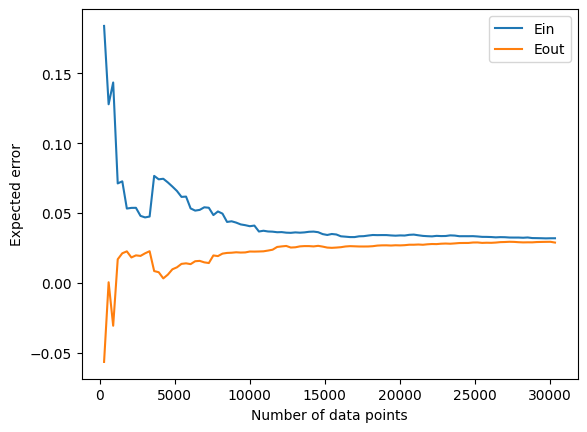

In [ ]:
# Crear la gráfica
plt.plot(N_points, expected_Ein, label='Ein')
plt.plot(N_points, expected_Eout, label='Eout')

# Agregar etiquetas y leyenda
plt.xlabel('Number of data points')
plt.ylabel('Expected error')
plt.legend()

# Mostrar la gráfica
plt.show()

Como error usamos el coeficiente de determinación, viendo la gráfica podemos observar que al principio Ein es muy alto (Aclaración, a diferencia de las gráficas del guión de la práctica donde probablemente se use una métrica de error donde a menor error mejor yo uso el coeficiente de determinación, que a mayor valor mejor, por eso mi gráfica es inversa a la de las diapositivas) esto se debe a que hay pocos datos que ajustar y se pueden ajustar facilmente con una recta, el problema es que lo que el modelo hace no es ajustar es memorizar, por lo que para datos fuera de la muestra lo hará mal porque no generaliza bien, vease el valor de Eout correspondiente a pocas muestras, según vamos entrenando con más muestras el Ein disminuye, ya que ahora hay más puntos y es más difícil de ajustar todos correctamente, pero Eout aumenta ya que ahora el modelo no memoriza y generaliza mejor para datos fuera de la muestra.

Como conclusión he de decir que tal vez me equivocaba al afirmar que existía un poco de sobreajuste en el entrenamiento de mi modelo, ya que con esta gráfica vemos que ambos errores convergen al mismo error, otra opción es que si exista cierto sobreajuste, pero como aquí usamos una parte de train como validación al final el modelo si que conocía esos datos y poner epsilon a 15 si es válido para este conjunto validación, pero no para test. Por lo que voy a hacer la misma gráfica pero usando test como validación a ver si convergen ambos errores.

In [ ]:
# Entrenamos progresivamente con un conjunto de entrenamiento mayor
expected_Ein = []
expected_Eout = []
N_points = []

model_RL_robusto_final = HuberRegressor(epsilon=15, max_iter=10000)

for i in range(99):
  X_aux, X_subtrain, y_aux, y_subtrain = train_test_split(mount_train_x, reduced_train_y, test_size=(i+1)*0.01, random_state=0)

  model_RL_robusto_final.fit(X_subtrain, y_subtrain)

  # Predecimos las etiquetas de ambos conjuntos
  pred_y_subtrain = model_RL_robusto_final.predict(X_subtrain)
  pred_y_test = model_RL_robusto_final.predict(mount_test_x)

  # Calculo los errores
  Ein = r2_score(y_subtrain, pred_y_subtrain)
  Eout = r2_score(test_y, pred_y_test)

  # Guardo los resultados
  expected_Ein.append(Ein)
  expected_Eout.append(Eout)
  N_points.append(y_subtrain.shape[0])

# Hacemos un último train usando todo el conjunto de train
model_RL_robusto_final.fit(mount_train_x, reduced_train_y)

# Predecimos las etiquetas de ambos conjuntos
pred_y_train = model_RL_robusto_final.predict(mount_train_x)
pred_y_test = model_RL_robusto_final.predict(mount_test_x)

# Calculo los errores
Ein = r2_score(reduced_train_y, pred_y_train)
Eout = r2_score(test_y, pred_y_test)

# Guardo los resultados
expected_Ein.append(Ein)
expected_Eout.append(Eout)
N_points.append(y_train.shape[0])

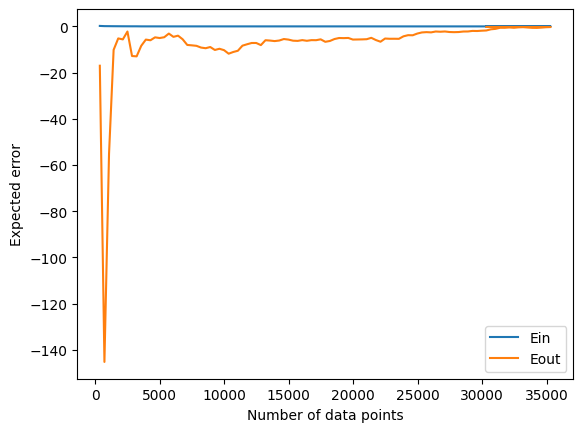

In [ ]:
# Crear la gráfica
plt.plot(N_points, expected_Ein, label='Ein')
plt.plot(N_points, expected_Eout, label='Eout')

# Agregar etiquetas y leyenda
plt.xlabel('Number of data points')
plt.ylabel('Expected error')
plt.legend()

# Mostrar la gráfica
plt.show()

En este caso igualmente convergen las soluciones, por lo que parece que finalmente estaba equivocado respecto al sobreajuste y el modelo es bueno en ese aspecto al menos.

#### <font color='blue'>9)  Suponga ahora que Ud. debe realizar este ajuste para una empresa que le ha proporcionado los datos, sin distinción entre training y test. ¿Cúal sería el mejor modelo que les propondría, y qué error  $E_{out}$ les diría que tiene? Justifique todas las decisiones. 0.5 puntos.

Primero separaría en los datos en train y test, dependiendo del tamaño del set inicial daría más porcentaje a test o menos, es importante tener un training set lo más grande posible para tener una mejor representación de la población, aunque también es importante que test set no sea muy pequeño, ya que queremos que este sea una representación fiable de la población fuera de la muestra para poder estimar un buen Eout al final del entrenamiento. En el caso de este problema considero que tener el 15% de los datos para test es suficiente.

Cuando tenemos nuestros dos sets uso Cross-Validation para encontrar el mejor modelo con los mejores parámetros para el ajuste, el uso de CV nos permite entrenar con distintos minisets de train usando otra parte de train para validar ese entrenamiento, a más minisets tengamos más entrenamientos se harán y obtendremos unas métricas medias más fiables, en nuestro caso usamos 5-folds CV, debemos encontrar un equilibrio entre tiempo de cómputo y folds a crear, con 5-folds tenemos ese equilibrio.

Una vez entrenado elegimos el mejor modelo comparando gracias a CV, reentrenamos el mismo con todo el train set y vemos como ajusta en test, apartir de ahí estimamos Eout.

Este es el esquema de entrenamiento, pero antes de empezar dicho entrenamiento sería conveniente visualizar un poco train para conocerlo mejor y tratar dichos datos, con esto me refiero a reducir dimensionalidad, eliminar muestras con valores extremos, codificar características o lo que sea conveniente dependiendo de los datos que se proporcionen.

En todo este proceso es muy importante no visualizar ni hacer nada con test, ya que ver de alguna forma test influirá en nuestra forma de proceder con el problema y esto puede resultar en un modelo que no generalice bien fuera de la muestra.